[*********************100%***********************]  1 of 1 completed


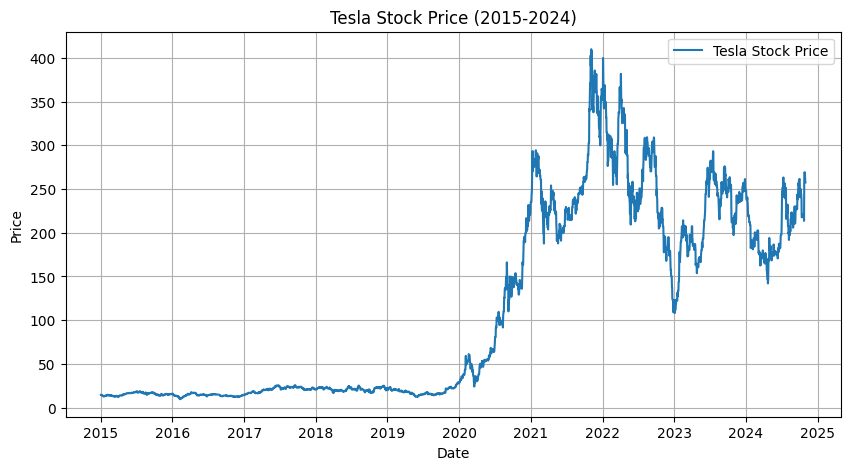

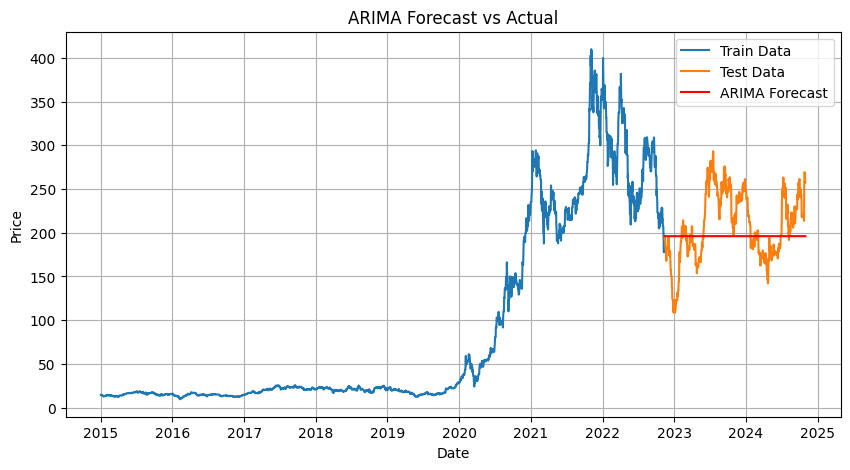

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06102D+00    |proj g|=  6.37243D-02

At iterate    5    f=  2.94049D+00    |proj g|=  2.09300D-02

At iterate   10    f=  2.93274D+00    |proj g|=  3.64071D-02

At iterate   15    f=  2.92912D+00    |proj g|=  1.63441D-03

At iterate   20    f=  2.92911D+00    |proj g|=  5.88591D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     23      1     0     0   5.886D-06   2.929D+00
  F =   2.9291056465908802     

CONVERG

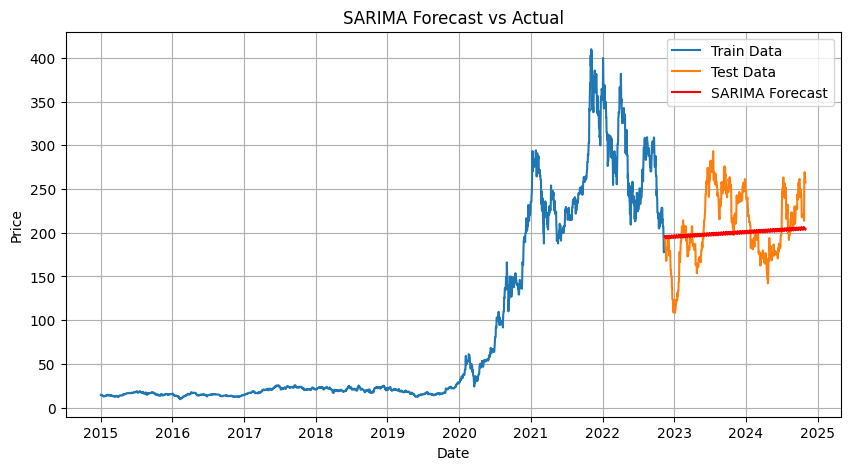

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - loss: 0.0278
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0017
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0015
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0014
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0013
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0012
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0012
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0012
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0010
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0010
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Start Index: 2932
End Index: 3589
Sliced Test Data Length: 657
LSTM Predictions Length: 657


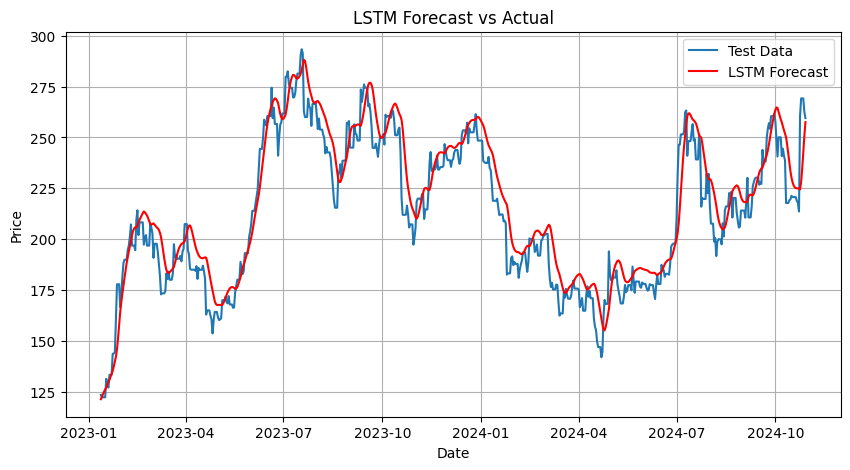

ARIMA - MAE: 33.062651859616956, RMSE: 40.371503576731854, MAPE: 0.16180895618287003
SARIMA - MAE: 31.935015232450933, RMSE: 38.77680065209026, MAPE: 0.15879954053454373
LSTM - MAE: 9.414054057732383, RMSE: 12.074019891932819, MAPE: 0.045543987122161816


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input  

# Step 1: Fetch Tesla stock data
data = yf.download('TSLA', start='2015-01-01', end='2024-10-31')

# Step 2: Use the 'Close' column for forecasting
tsla_data = data['Close']

# Step 3: Ensure the index has a frequency (daily frequency)
tsla_data = tsla_data.asfreq('D', method='pad')  
# Step 4: Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data[:train_size], tsla_data[train_size:]

# Step 5: Plot the data to visualize the stock price trend
plt.figure(figsize=(10, 5))
plt.plot(tsla_data, label='Tesla Stock Price')
plt.title('Tesla Stock Price (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# ### ARIMA Model ###
# Step 6: ARIMA Model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Step 7: Forecast the next values using ARIMA
forecast_arima = arima_model_fit.forecast(steps=len(test))
forecast_arima_series = pd.Series(forecast_arima, index=test.index)

# Step 8: Plot ARIMA Forecast vs Actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_arima_series, label='ARIMA Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# ### SARIMA Model ###
# Step 9: SARIMA Model (Seasonal ARIMA)
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Step 10: Forecast the next values using SARIMA
forecast_sarima = sarima_model_fit.get_forecast(steps=len(test))
forecast_sarima_values = forecast_sarima.predicted_mean

# Step 11: Plot SARIMA Forecast vs Actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_sarima_values, label='SARIMA Forecast', color='red')
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# ### LSTM Model ###
# Step 12: Prepare data for LSTM model (Scale and reshape)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_data.values.reshape(-1, 1))

# Prepare the training and testing datasets
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape data for LSTM
time_step = 60  
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 13: Build the LSTM Model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], 1))) 
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Step 14: Train the LSTM Model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 15: Forecast using LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Step 16: Plot LSTM Forecast vs Actual
start_index = train_size + time_step  
end_index = start_index + len(lstm_predictions)

# Ensure the start_index is within bounds of the entire dataset
if start_index >= len(tsla_data):
    print(f"start_index {start_index} is out of bounds, adjusting.")
    start_index = len(tsla_data) - len(lstm_predictions)  

# Ensure end_index does not exceed the length of the test data
if end_index > len(tsla_data):
    print(f"end_index {end_index} exceeds the length of the data, adjusting.")
    end_index = len(tsla_data)

# Ensure both indices are within bounds for the test data
test_sliced = test[start_index - train_size: end_index - train_size]  
# Print the slice details for debugging
print(f"Start Index: {start_index}")
print(f"End Index: {end_index}")
print(f"Sliced Test Data Length: {len(test_sliced)}")
print(f"LSTM Predictions Length: {len(lstm_predictions)}")

# Ensure both the X and Y values are the same length before plotting
assert len(lstm_predictions) == len(test_sliced), f"Mismatch: {len(lstm_predictions)} vs {len(test_sliced)}"

# Now plot the actual vs predicted data
plt.figure(figsize=(10, 5))

# Plot the test data (Actual values)
plt.plot(tsla_data.index[start_index:end_index], test_sliced, label='Test Data')

# Plot the LSTM predictions
plt.plot(tsla_data.index[start_index:end_index], lstm_predictions, label='LSTM Forecast', color='red')

# Add labels and title
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


# ### Model Evaluation ###
# Step 17: Calculate Evaluation Metrics for each model
y_test_lstm = test[time_step:].values  # Take the test set after time_step

# Trim y_test_lstm or lstm_predictions to the same length
if len(y_test_lstm) > len(lstm_predictions):
    y_test_lstm = y_test_lstm[:-1]  
elif len(lstm_predictions) > len(y_test_lstm):
    lstm_predictions = lstm_predictions[:-1]  

# Ensure both arrays have the same length
assert len(y_test_lstm) == len(lstm_predictions), f"Mismatch: {len(y_test_lstm)} vs {len(lstm_predictions)}"

# ARIMA Metrics
mae_arima = mean_absolute_error(test, forecast_arima_series)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima_series))
mape_arima = mean_absolute_percentage_error(test, forecast_arima_series)

# SARIMA Metrics
mae_sarima = mean_absolute_error(test, forecast_sarima_values)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima_values))
mape_sarima = mean_absolute_percentage_error(test, forecast_sarima_values)

# LSTM Metrics
mae_lstm = mean_absolute_error(y_test_lstm, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, lstm_predictions))
mape_lstm = mean_absolute_percentage_error(y_test_lstm, lstm_predictions)

# Display Evaluation Metrics
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}")
